In [2]:
%load_ext autoreload
%autoreload 2

import sys
import pandas
sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
warnings.filterwarnings('ignore')
import os

datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_MonomerMeasurements/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_MonomerMeasurements/Plots/'
#dataout  = '/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/RiccyProject/Plotting/Plots/'

import sys

# Check the current recursion limit
current_limit = sys.getrecursionlimit()
print("Current recursion limit:", current_limit)

# Increase the recursion limit
sys.setrecursionlimit(6000)

Current recursion limit: 3000


In [3]:
def phiform(phi0,phi_inf,tau,t):
    if tau==0:
        phi = phi_inf
    else:
        phi = (phi0)*np.exp(-t/tau)+phi_inf
    return phi

def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x,diff[x]

In [4]:
cmap0 = plt.cm.get_cmap('Spectral_r') #YlOrBr
clrs1= ['#edf8b1','#7fcdbb','#2c7fb8']
clrs2=['#f7fcb9','#addd8e','#31a354']
#clrs2= ['#ece2f0','#a6bddb','#1c9099']
clrs3 = ['#e7e1ef','#c994c7','#dd1c77']

clrs_5 = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84','dimgrey']
#clrs_5 = ['#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494']
clrs1= ['grey','#7fcdbb','#2c7fb8']
clrs2=['grey','#addd8e','#31a354']
#clrs2= ['#ece2f0','#a6bddb','#1c9099']
clrs3 = ['grey','#c994c7','#dd1c77']
clrs_div = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
ClrsRici = ["#96a2c1ff","#999ebeff","#a697baff","#b795afff","#c996a8ff","#d398a5ff"]
ClrsRici = ["#7883acff","#3e387bff","#73457aff","#a66181ff","#b25268ff","#d49995ff"] #"#b7645fff"]
clrrrs=[clrs1,clrs3,clrs2]

In [5]:
## Skip some 

## Master Plot equilibrium

monomerdata_BP0.04_S1.dat
monomerdata_BP0.04_S2.dat
monomerdata_BP0.04_S3.dat
monomerdata_BP0.03_S1.dat
monomerdata_BP0.03_S2.dat
monomerdata_BP0.03_S3.dat
monomerdata_BP0.02_S1.dat
monomerdata_BP0.02_S2.dat
monomerdata_BP0.02_S3.dat
monomerdata_BP0.01_S1.dat
monomerdata_BP0.01_S2.dat
monomerdata_BP0.01_S3.dat
monomerdata_BP0.007_S1.dat
monomerdata_BP0.007_S2.dat
monomerdata_BP0.007_S3.dat
monomerdata_BP0.003_S1.dat
monomerdata_BP0.003_S2.dat
monomerdata_BP0.003_S3.dat


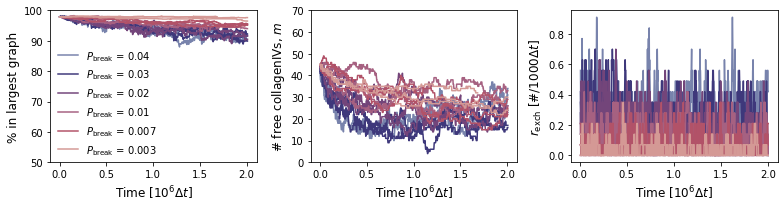

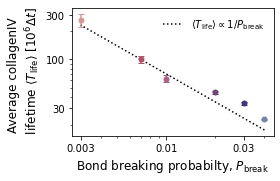

In [7]:
fig,ax = plt.subplots(1,3,figsize = (11,3))
fig2,ax2 = plt.subplots(1,figsize = (4,2.6))
timefactor = 10**6
f=3
MP = "0.12 0.1 0.06 0.03 0.02 0.01".split() # ORIGINAL RANGE  0.12 0.1 0.06 0.03 0.02 0.01
BP = "0.04 0.03 0.02 0.01 0.007 0.003".split() # ORIGINAL RANGE 0.04 0.03 0.02 0.01 0.007 0.003
seeds= "1 2 3".split()
BPsV = [0.04,0.03,0.02,0.01,0.007,0.003] #,0.03,0.02,0.01, 0.007,0.005,0.003
xstretches = "36 72 108".split()
j=0
#BPv = [0.04,0.03,0.02,0.01,0.007]
RateMonsAll = []
for f in range(len(MP)):
    IndividualT_MonRelase = []
    for s in range(len(seeds)):
        #Time NumMons RateMons LargestComp
        filename = 'monomerdata_BP'+BP[f]+'_S'+seeds[s]+'.dat'
        print(filename)
        MonData = pandas.read_csv(datadir+filename, header = 'infer',sep=' ')
        Time_ = MonData.Time
        NumMons_ = MonData.NumMons
        RateMons_ = MonData.RateMons
        LargestComp_ = MonData.LargestComp
        Time,NumMons,RateMons,LargestComp =Time_.values,NumMons_.values,RateMons_.values,LargestComp_.values
        #Time = Time_.astype('float')
        #print(Time[0])
        
        if len(Time)>0:
            if float(Time[-1]) >1.5e6:                    
                AvNumMons = np.mean(NumMons[int(len(RateMons)/2):])
                NumInNetwork = 6330-AvNumMons
                AverageT_MonRelease = np.divide(1,np.mean(np.abs(RateMons[int(len(RateMons)/2):])))
                IndividualT_MonRelase.append(np.divide(AverageT_MonRelease * NumInNetwork,10**6))
                #IndividualT_MonRelase.append(AverageT_MonRelease)

                N=7
                rollingRatAv = np.convolve(np.abs(np.ravel(RateMons)), np.ones(N)/N, mode='valid')
                timeRol = Time[int(N/2)+1:-int(N/2-1)]
                #ax[2].plot(Time[1:],np.abs(RateMons),alpha = 0.1,linestyle = '',marker = 'o',color = clrs_5[f])
                ax[2].plot(np.divide(timeRol,timefactor),np.multiply(rollingRatAv,1000),color = ClrsRici[f])

                concate = 1
                if s==0:
                    ax[0].plot(np.divide(Time,timefactor),100*LargestComp/6330,markersize = 2,color = ClrsRici[f],label = "$P_{\mathrm{break}}$ = "+BP[f])
                else:
                    ax[0].plot(np.divide(Time,timefactor),100*LargestComp/6330,markersize = 2,color = ClrsRici[f])
                ax[1].plot(np.divide(Time[concate:-concate],timefactor),NumMons[concate:-concate],color = ClrsRici[f])
            #print(NumMons[-1],seeds[s],MP[f])
    ax2.errorbar(BPsV[f],np.mean(IndividualT_MonRelase),yerr = np.std(IndividualT_MonRelase),capsize = 3,color = ClrsRici[f],marker = 'o',markersize = 5) ##Would this by x2??
    #ax2.plot(BPsV[f],np.divide(np.mean(IndividualT_MonRelase),10**6),color = clrs_5[f],marker = 'o',markersize = 10) ##Would this by x2??
    #print(MP[f],np.mean(IndividualT_MonRelase),np.std(IndividualT_MonRelase))
ax[0].legend(frameon=False,fontsize = 10,loc = [0.02,0.01])
ax[0].set_ylabel("% in largest graph",fontsize = 12)
ax[1].set_ylabel("# free collagenIVs, $m$",fontsize = 12)

ax[0].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize = 12)
ax[2].set_ylabel(r"$r_{\mathrm{exch}}$ [#$/1000\Delta t$]",fontsize = 12)
ax2.plot(BPsV,np.divide(0.7,BPsV),color = 'black',linestyle = ':',label = r"$\langle T_{\mathrm{life}}\rangle \propto 1/P_{\mathrm{break}}$")
ax[1].set_ylim([0,70])
ax[0].set_ylim([50,100])
#ax[2].set_ylabel("Free monomer lifetime",fontsize = 12)
ax2.set_ylabel("Average collagenIV \n lifetime"+r" $ \langle T_{\mathrm{life}}\rangle$ [$10^6\Delta t$]",fontsize = 12)
ax2.set_xlabel("Bond breaking probabilty, $P_{\mathrm{break}}$",fontsize = 12)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks([0.003,0.01,0.03],['0.003','0.01','0.03'])
ax2.set_yticks([30,100,300],['30','100','300'])
#ax2.set_yticks([0,100,200,300],['0','100','200','300'])
#ax2.set_ylim([50,350])
ax2.legend(frameon=False)
fig.tight_layout()
fig2.tight_layout()


#ax.set_ylim([70,100])
plotname = "EquilibriumMaster.pdf"
#fig.savefig(plotsdir+plotname)

plotname2 = "MonomerExchangeMaster.pdf"
#fig2.savefig(plotsdir+plotname2)
##plotname = "Equilibration_quants.pdf"


In [5]:
## properties during relax